In [32]:
# %pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import wordcloud

import warnings
from collections import Counter
import datetime
import json
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')
# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
%matplotlib notebook
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [26]:
# df = pd.read_csv('/Users/zhujinghong/5003/project/CA.csv/CA_pre.csv')
df = pd.read_csv('/Users/zhujinghong/Downloads/5003 project/pre_data/CA_pre.csv')

In [27]:
df.head()

,category_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,category_title
0,28,18.29.03,iPad — Homework (Full Version) — Apple,Apple,2018-03-27T16:08:41.000Z,"\apple\""|\""ipad\""|\""apple ipad\""|\""apple penci...",816590,24030,2102,0,Science & Technology
1,24,18.15.04,Marc Spelmann gets the first Golden Buzzer of ...,Britain's Got Talent,2018-04-14T19:53:33.000Z,"\britain's got talent\""|\""britains got talent\...",727663,34107,547,0,Entertainment
2,24,18.03.05,Dr. Phil To Guest: ‘Have You Been Drinking Tod...,Dr. Phil,2018-05-02T17:43:56.000Z,"\series\""|\""host\""|\""news\""|\""dr.\""|\""phil\""|\...",39958,456,12,0,Entertainment
3,25,18.21.02,"PBS NewsHour full episode February 20, 2018",PBS NewsHour,2018-02-21T00:55:41.000Z,[none],39496,260,27,0,News & Politics
4,10,18.30.01,"DJ Khaled, Rihanna - Wild Thoughts (2018 Live ...",Super Netvid,2018-01-29T03:11:56.000Z,[none],3014847,42556,2791,0,Music


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40870 entries, 0 to 40869
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category_id     40870 non-null  int64 
 1   trending_date   40870 non-null  object
 2   title           40870 non-null  object
 3   channel_title   40870 non-null  object
 4   publish_time    40870 non-null  object
 5   tags            40870 non-null  object
 6   views           40870 non-null  int64 
 7   likes           40870 non-null  int64 
 8   dislikes        40870 non-null  int64 
 9   comment_count   40870 non-null  int64 
 10  category_title  40796 non-null  object
dtypes: int64(5), object(6)
memory usage: 3.4+ MB


### Data clearning

In [22]:
df[df["category_title"].apply(lambda x: pd.isna(x))].head(3)

,category_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,category_title
207,29,18.25.02,Sri Devi Died with Heart Attack-Exclusive Phot...,Yes Man,2018-02-25T01:33:22.000Z,"\Sridevi death\""|\""sri devi body\""|\""sri death...",169105,579,295,0,NaN
1223,29,18.01.01,Pasteur Grégory Toussaint | 12 Nuits d'Adorati...,Tele Shekinah,2018-01-01T07:35:22.000Z,"\I know who I am\""|\""Patience\""|\""Love\""|\""Hea...",26096,788,29,4,NaN
1357,29,17.15.11,Ex-intelligence chiefs fire back at Trump crit...,CNN,2017-11-12T15:36:51.000Z,"\James Clapper\""|\""John Brennan\""|\""President ...",311936,2627,1196,3621,NaN


In [28]:
df=df.dropna(axis=0)

In [29]:
df[df["category_title"].apply(lambda x: pd.isna(x))].head(3)

,category_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,category_title


### Analysis

In [9]:
#（一）Statistical information about the numerical columns
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40870.00,40870.00,40870.00,40870.00,40870.00
mean,20.80,1147116.86,39583.45,2009.46,5043.42
std,6.78,3391292.79,132697.67,19010.89,21581.41
min,1.00,733.00,0.00,0.00,0.00
25%,20.00,143905.50,2192.00,99.00,417.00
50%,24.00,371301.50,8782.50,303.00,1301.00
75%,24.00,963443.00,28717.75,950.00,3713.00
max,43.00,137843120.00,5053338.00,1602383.00,1114800.00


<IPython.core.display.Javascript object>


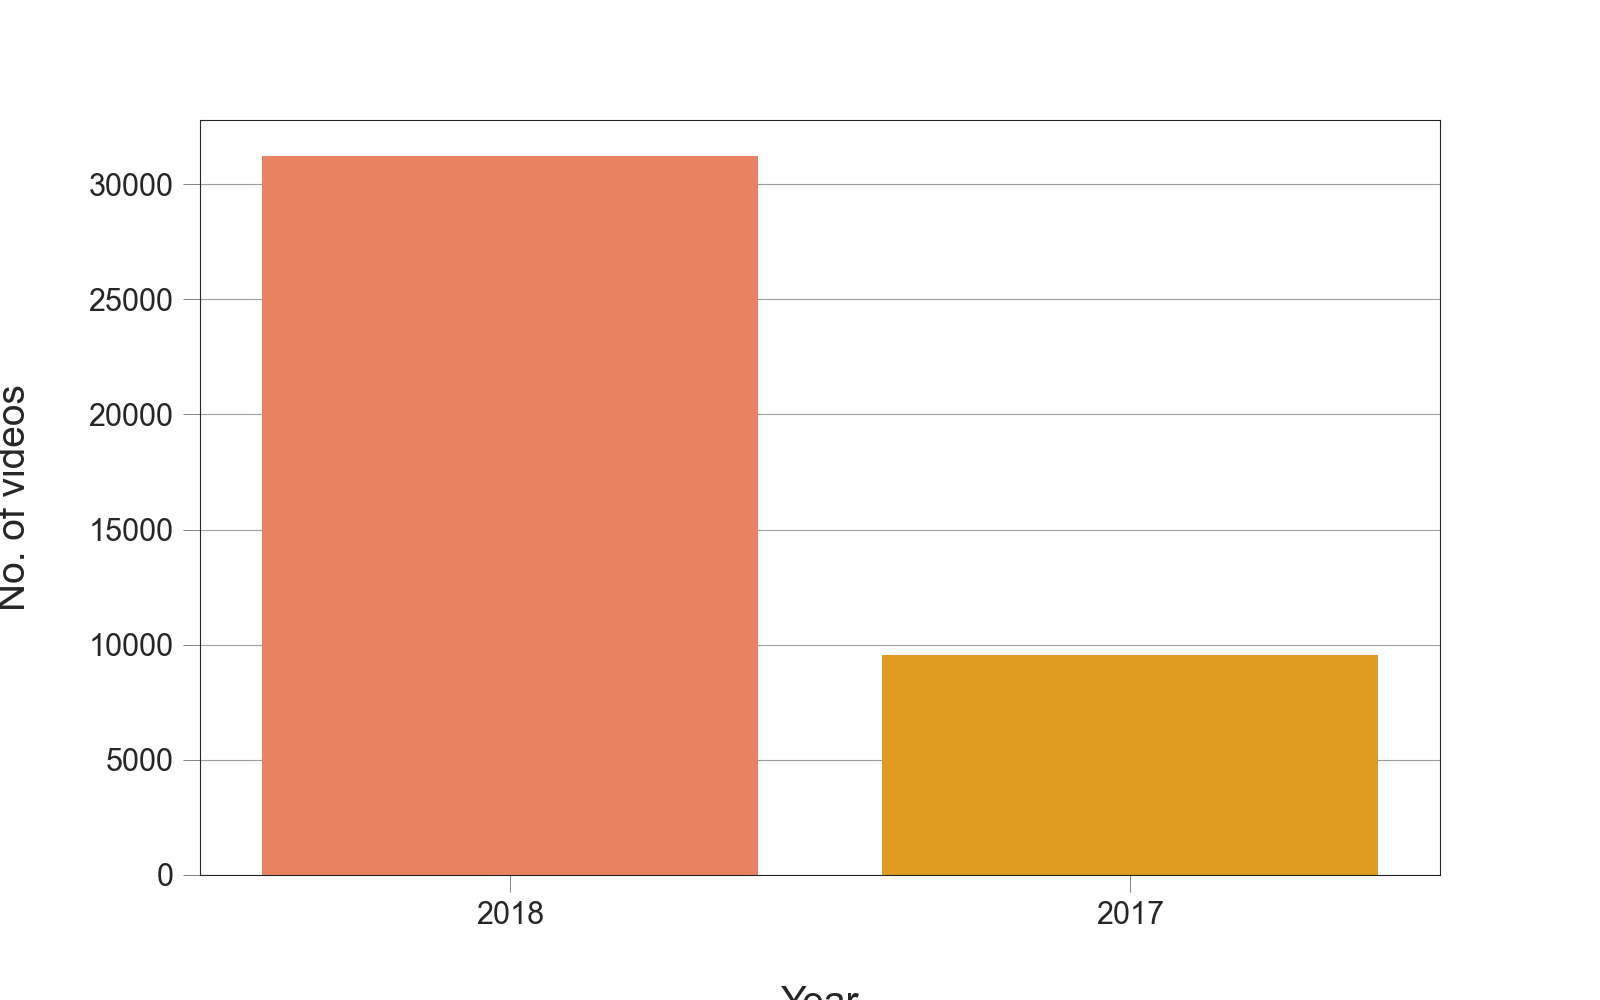

In [30]:
# 1、Data collection years
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [31]:
# distribution of data collected year 
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

<IPython.core.display.Javascript object>


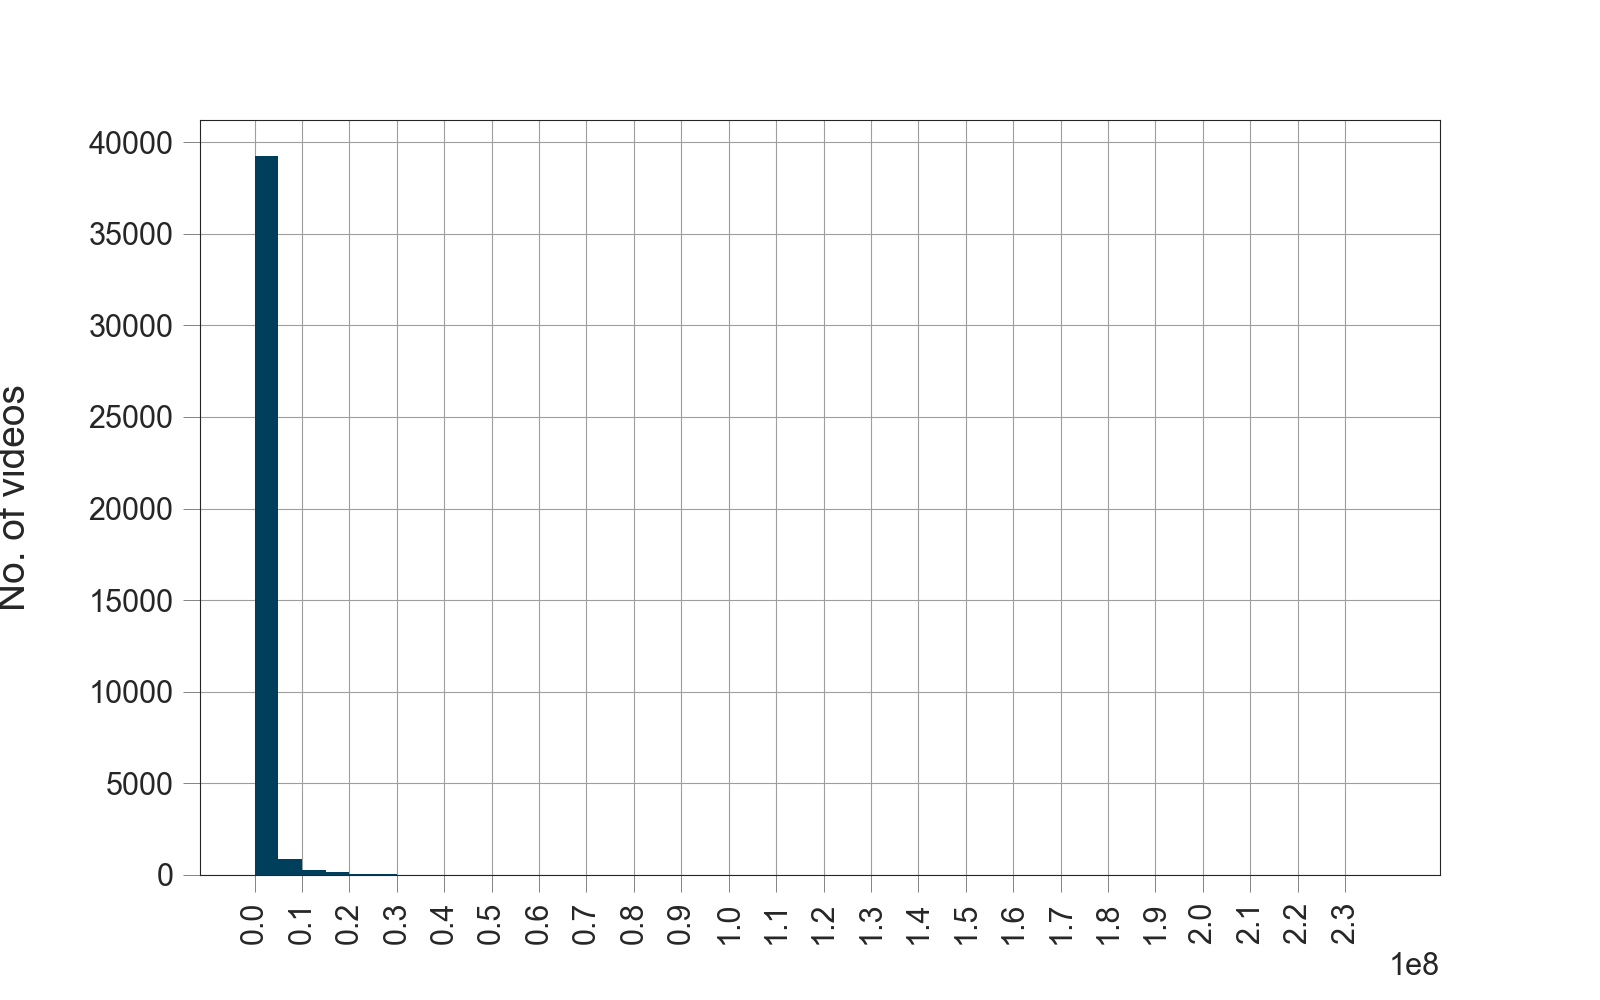

In [32]:
# 2、views
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

<IPython.core.display.Javascript object>


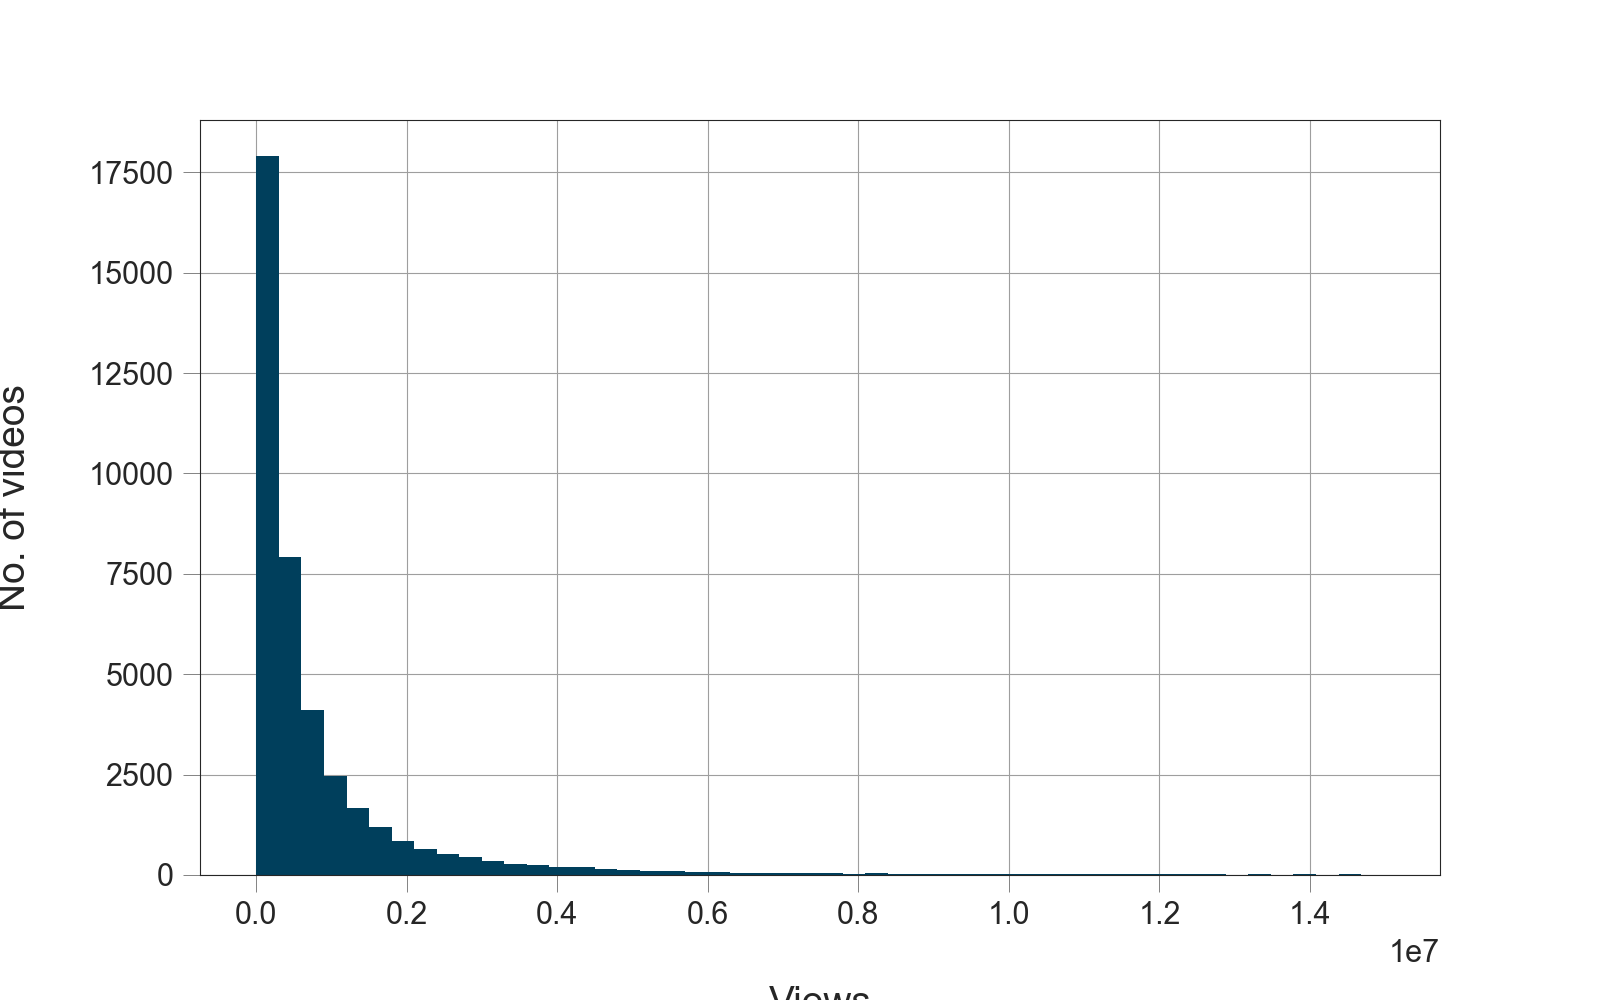

In [33]:
# just for videos with 20 million views or less
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 15e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [53]:
# the majority of trending videos have 1 million views or less.
# The exact percentage of videos less than 1 million views
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

75.8200631100022

<IPython.core.display.Javascript object>


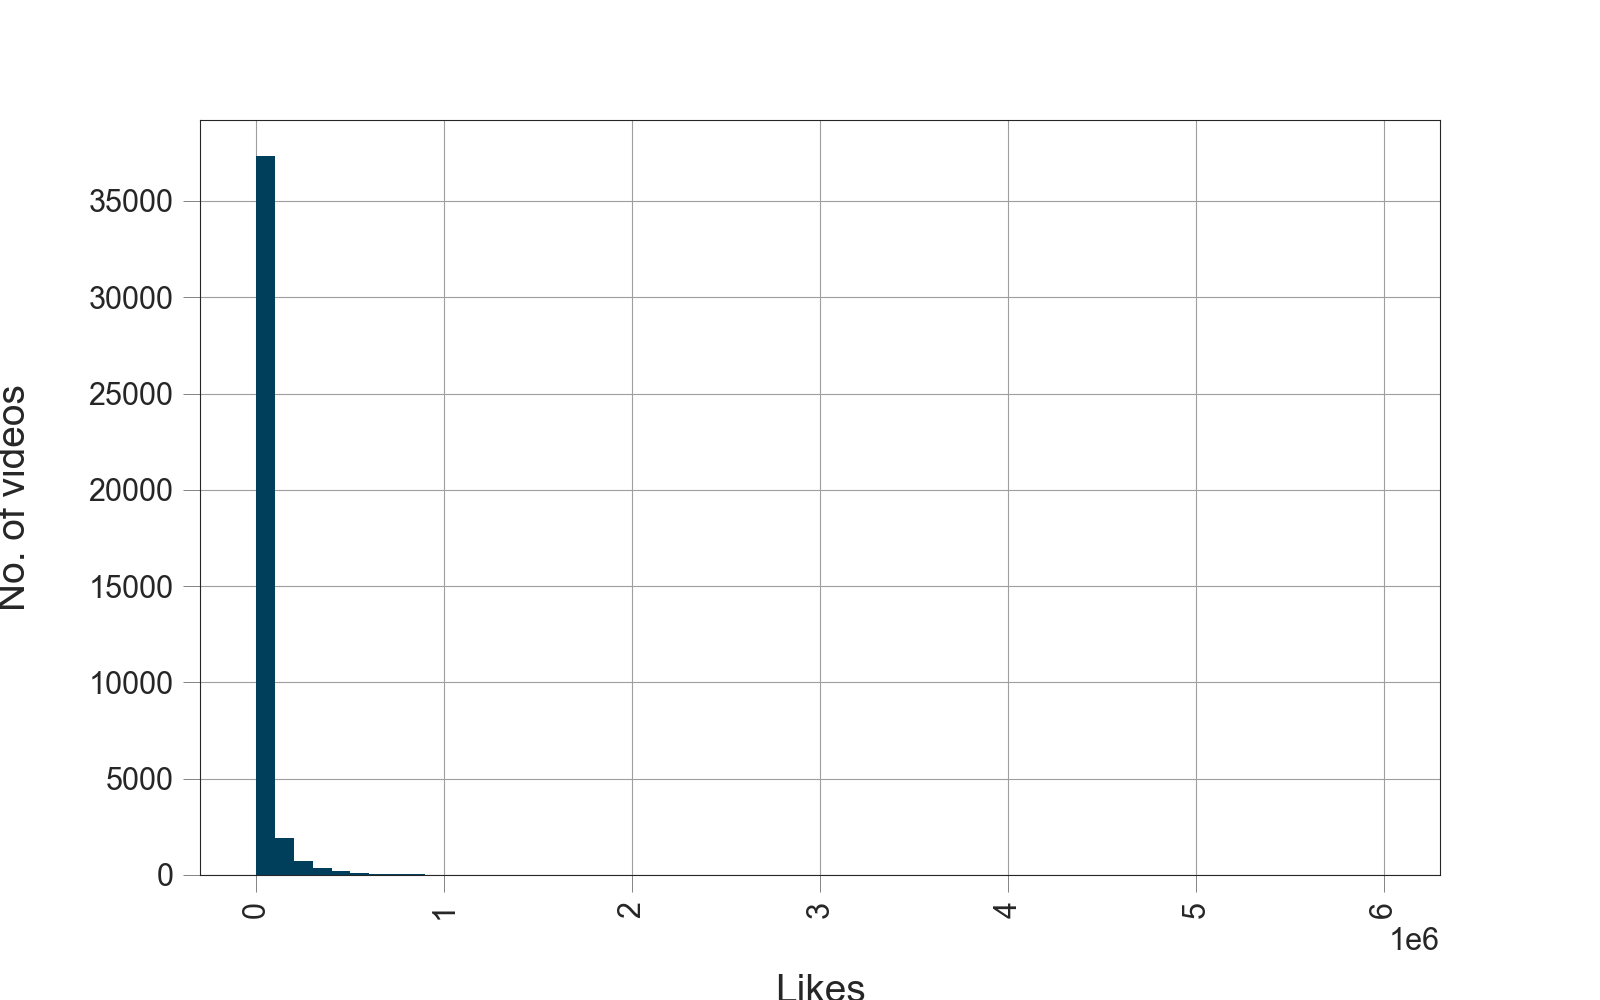

In [54]:
# 3、likes
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

<IPython.core.display.Javascript object>


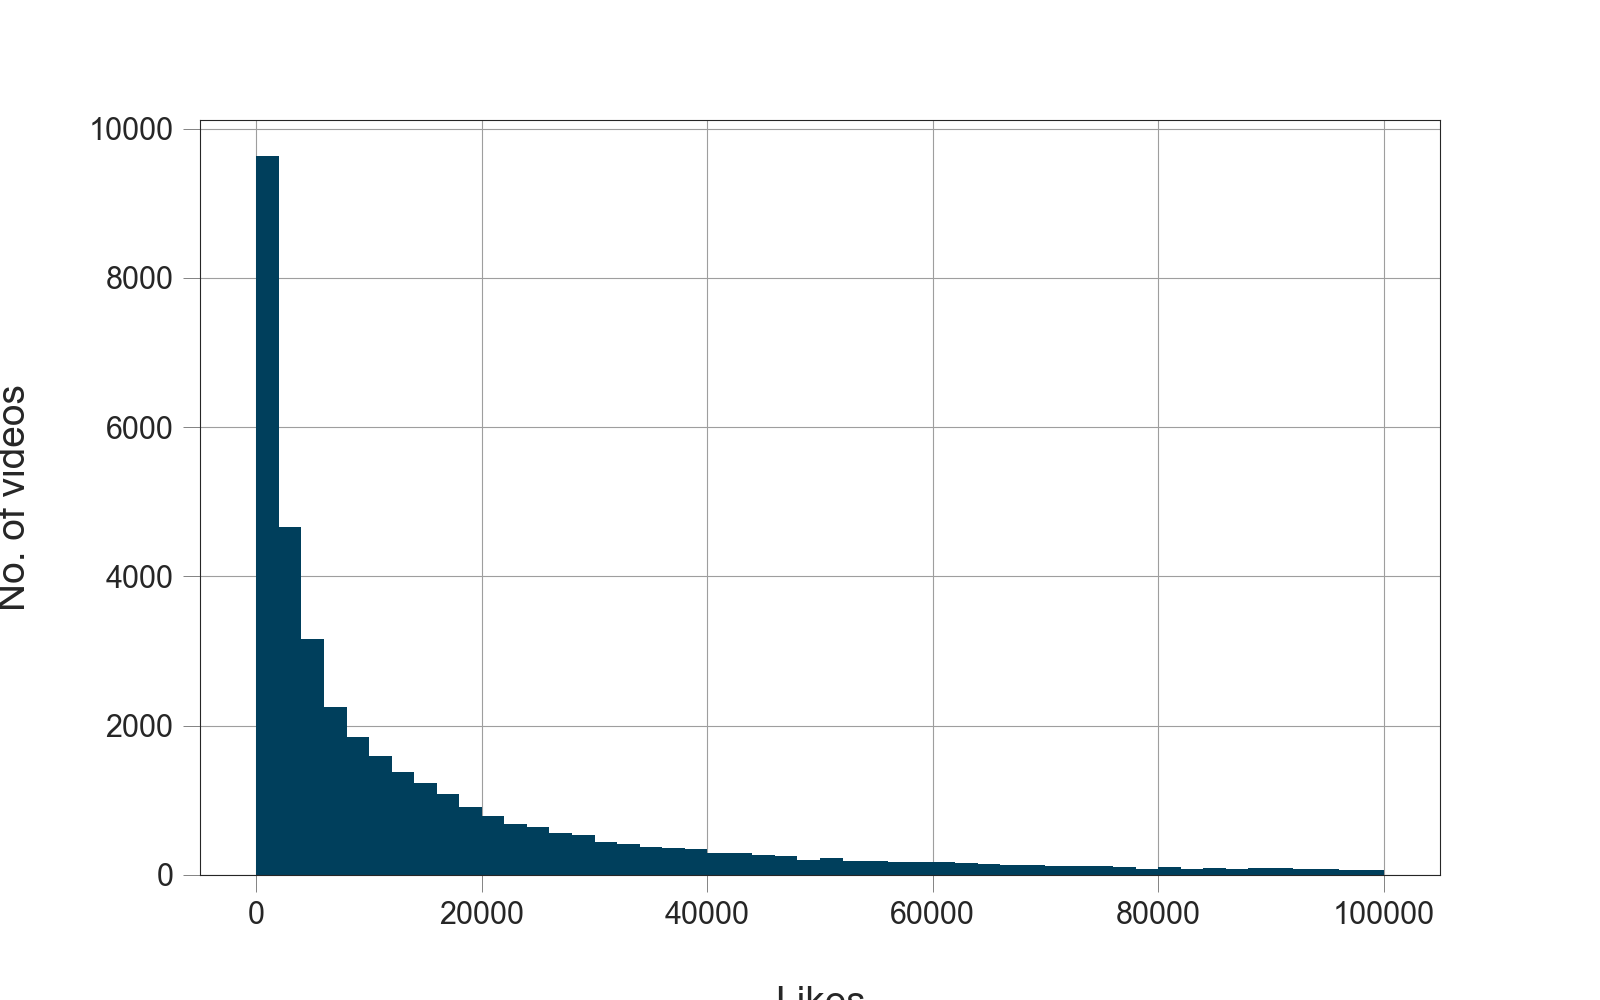

In [55]:
#  just for videos with 1000,000 likes or less 
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [56]:
# the exact percentage of videos with less than 40000 likes
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

80.5802206403953

<IPython.core.display.Javascript object>


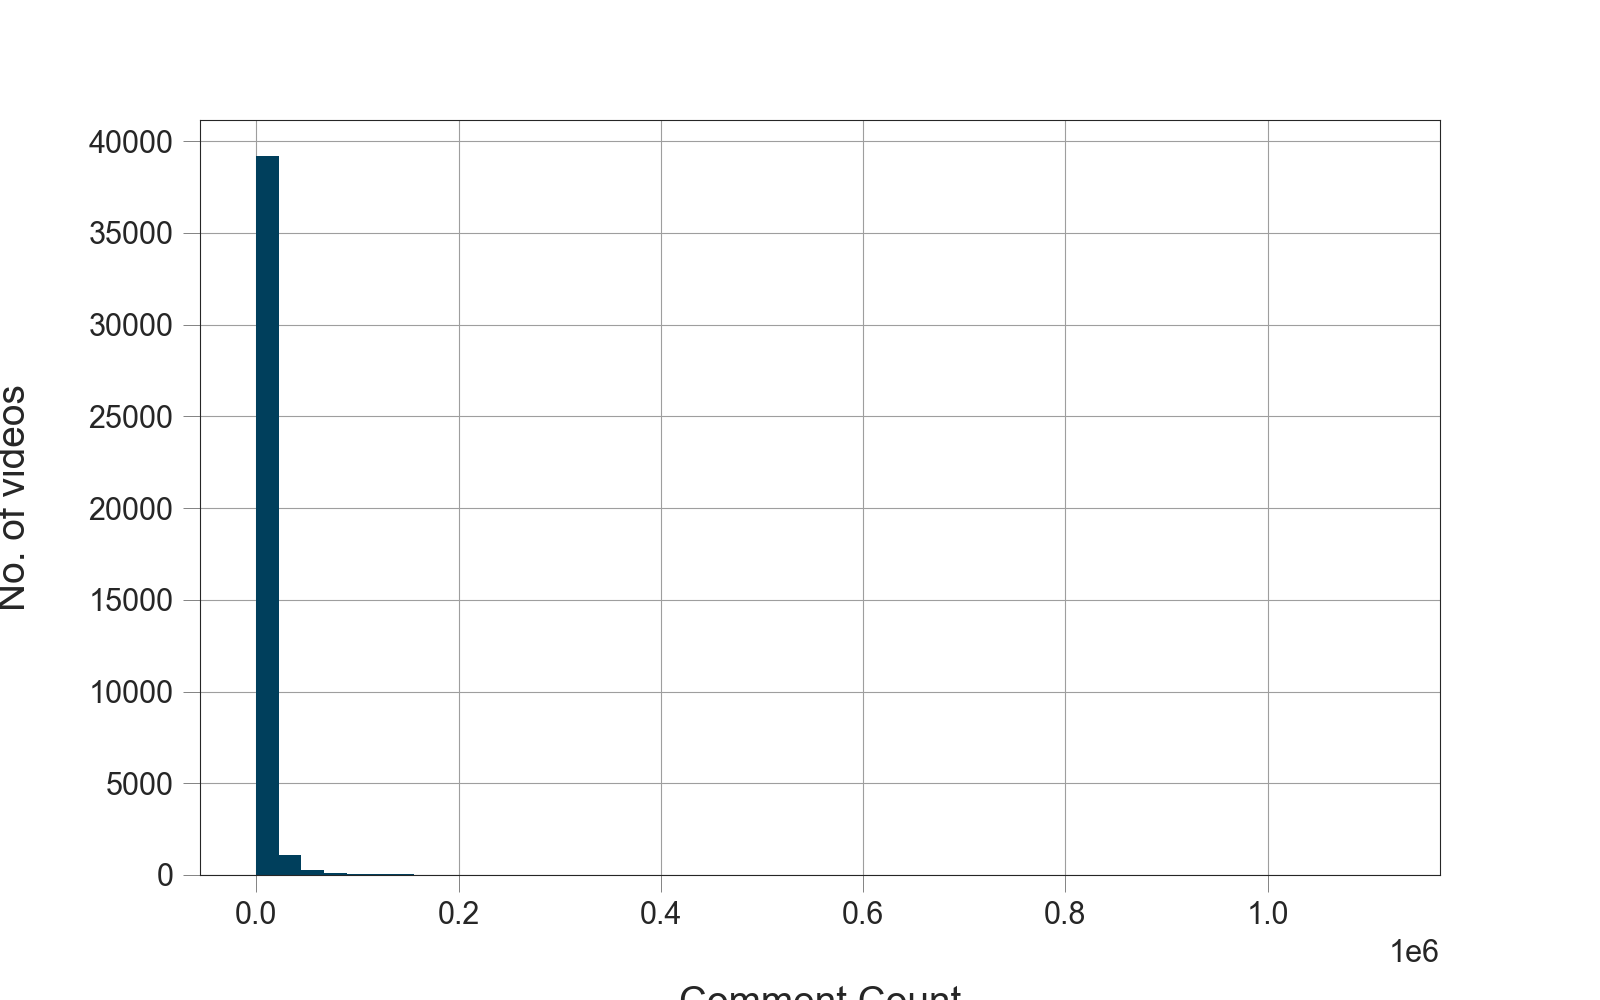

In [57]:
# 4、comment_count
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

<IPython.core.display.Javascript object>


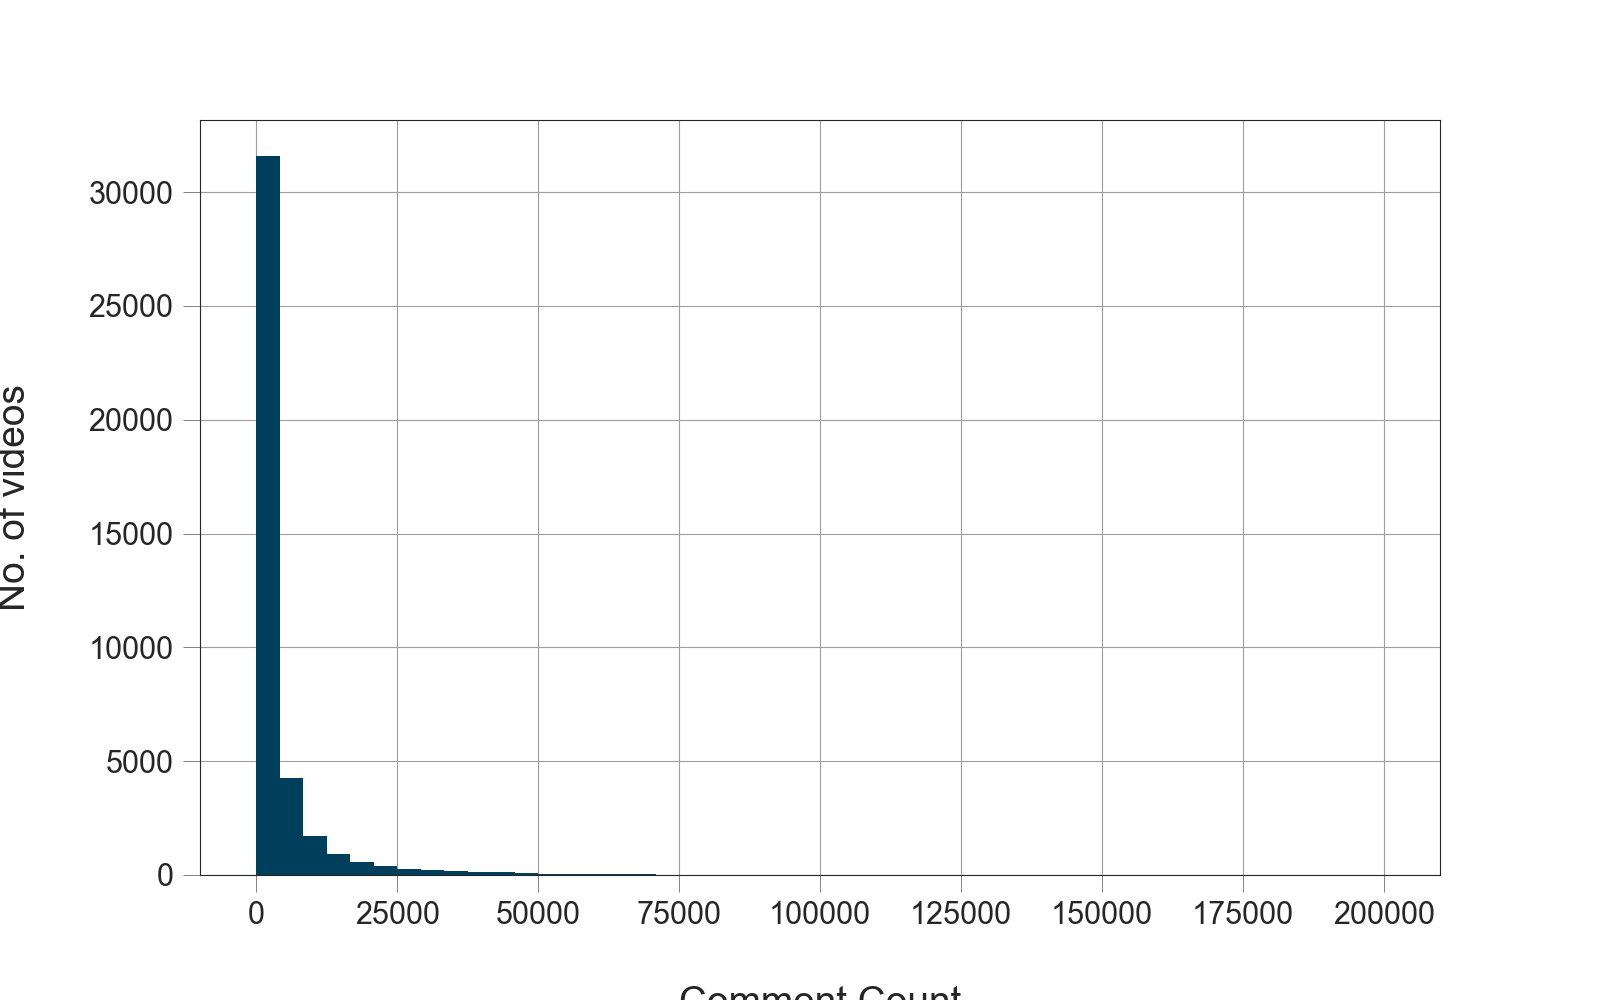

In [58]:
# comment count larger than 200000
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [59]:
#  the percentage of videos with less than 25,000 comments
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

76.51720848315844

### Non-numerical columns

In [13]:
# Describe non-numerical columns
df.describe(include = ['O'])

,trending_date,title,channel_title,publish_time,tags,category_title
count,40870,40870,40870,40870,40870,40796
unique,205,24570,5076,23613,20157,16
top,18.04.04,Drake - God's Plan (Official Audio),SET India,2017-12-20T23:00:00.000Z,[none],Entertainment
freq,200,15,191,11,2384,13447


<IPython.core.display.Javascript object>


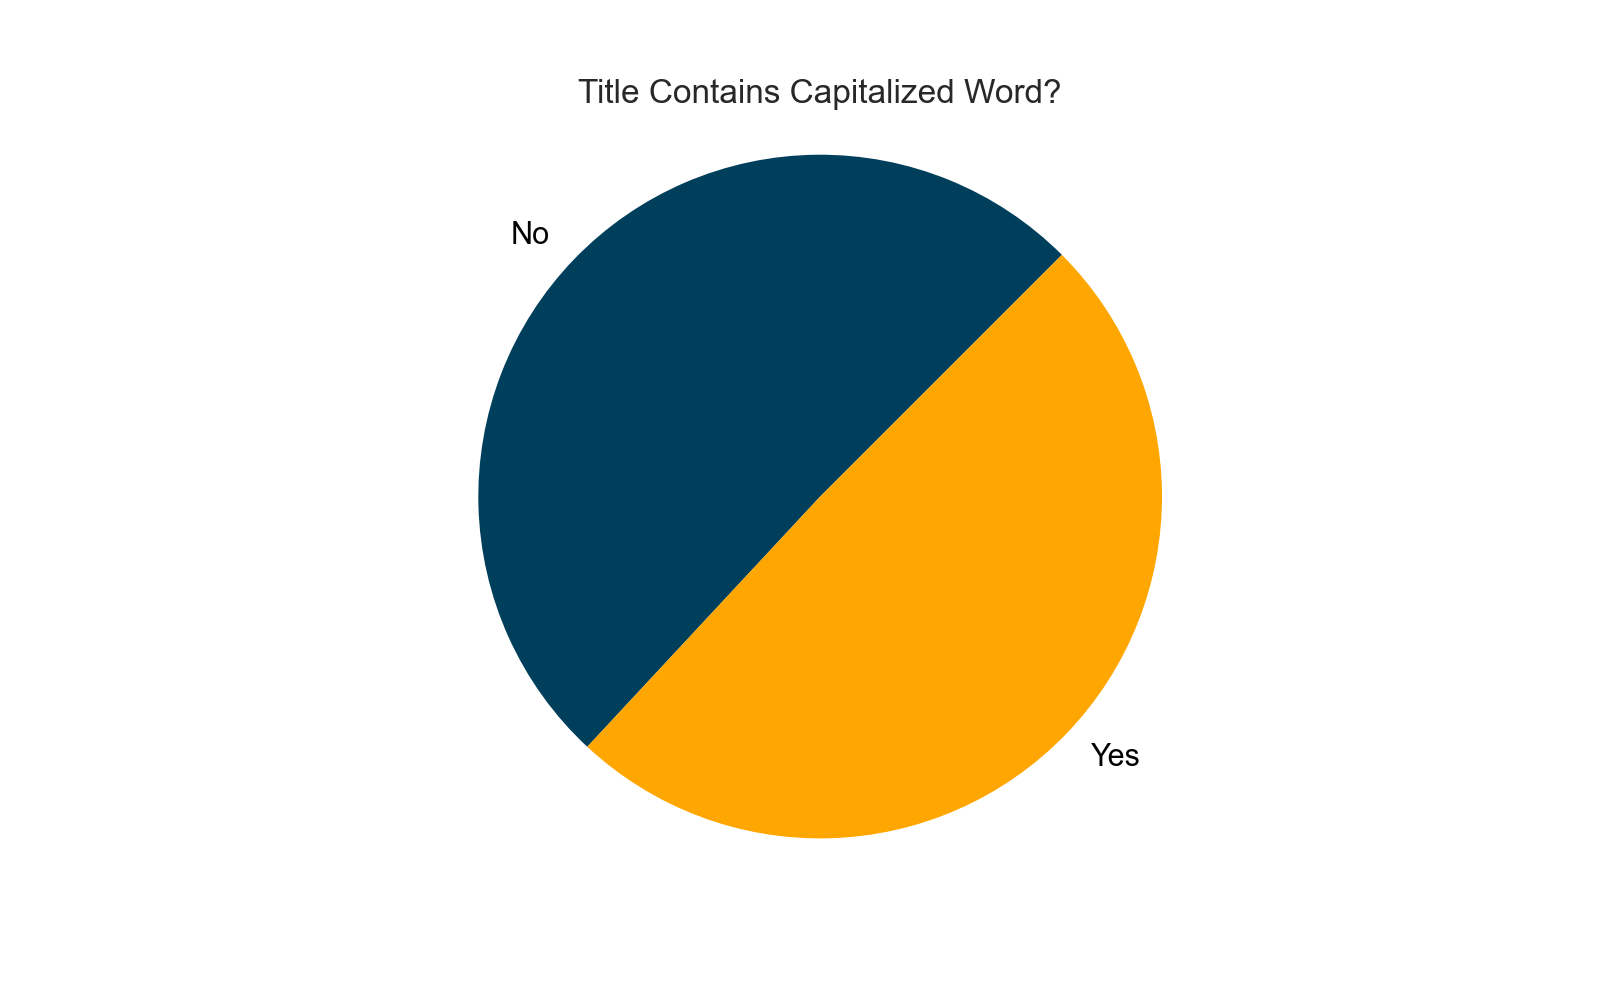

In [61]:
# 1、how many trending video titles contain at least a capitalized word 
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [62]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.51
True    0.49
Name: contains_capitalized, dtype: float64

<IPython.core.display.Javascript object>


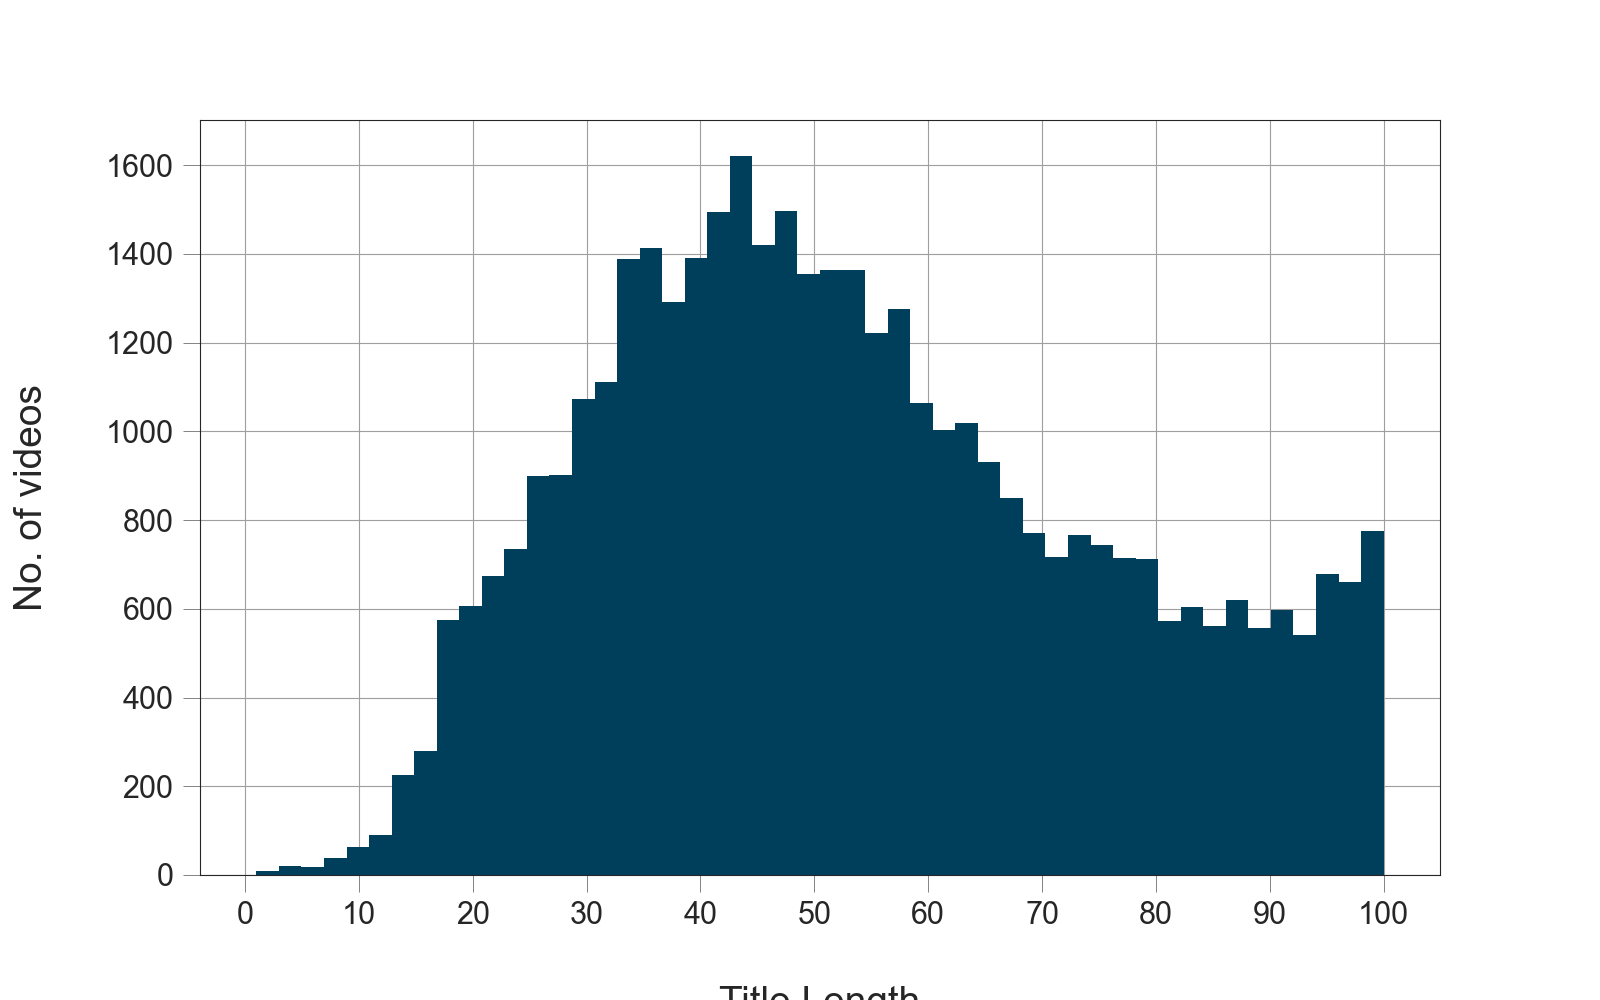

In [63]:
# 2、the lengths of trending video titles
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

<IPython.core.display.Javascript object>


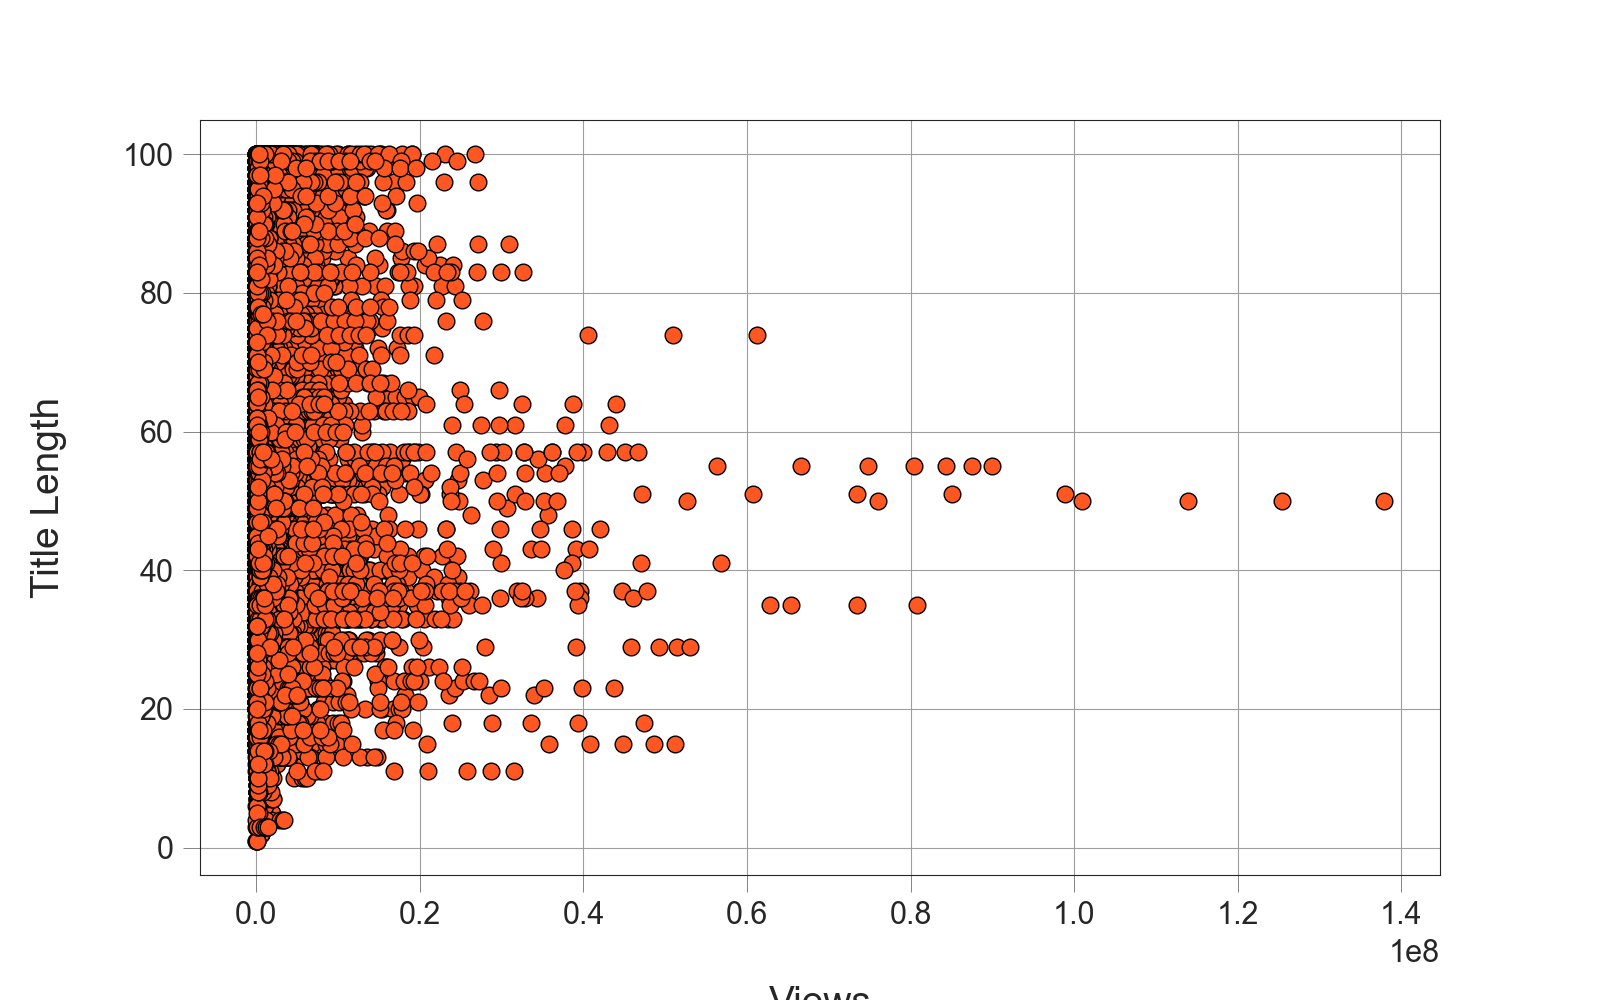

In [64]:
# 3、the relationship between title length and number of views 
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

### Correlation between 2 variables

In [34]:
df.corr()

,category_id,views,likes,dislikes,comment_count
category_id,1.00,-0.14,-0.15,-0.03,-0.08
views,-0.14,1.00,0.83,0.56,0.71
likes,-0.15,0.83,1.00,0.45,0.84
dislikes,-0.03,0.56,0.45,1.00,0.62
comment_count,-0.08,0.71,0.84,0.62,1.00


<IPython.core.display.Javascript object>


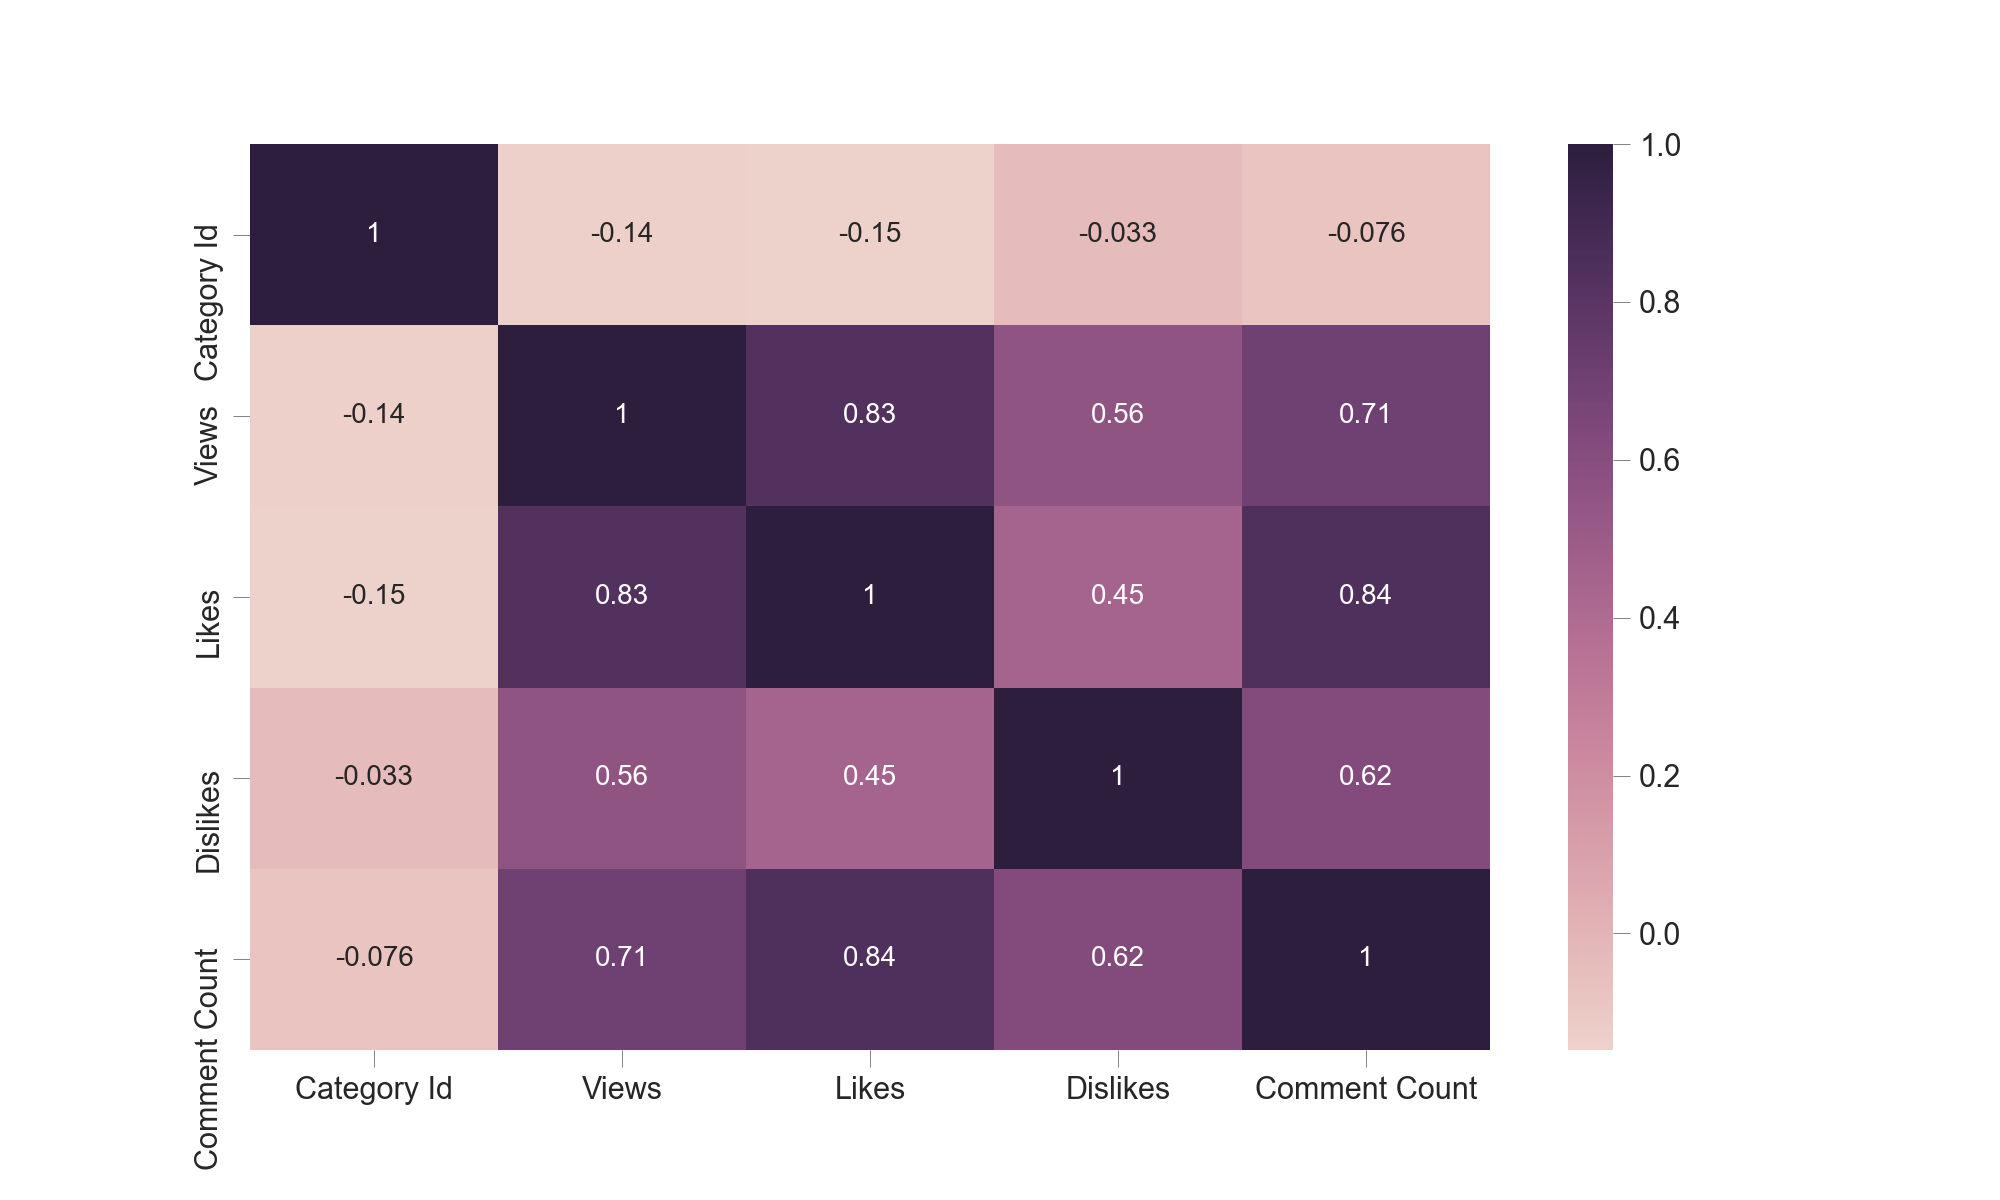

In [35]:
# 1、visualize the correlation table
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

<IPython.core.display.Javascript object>


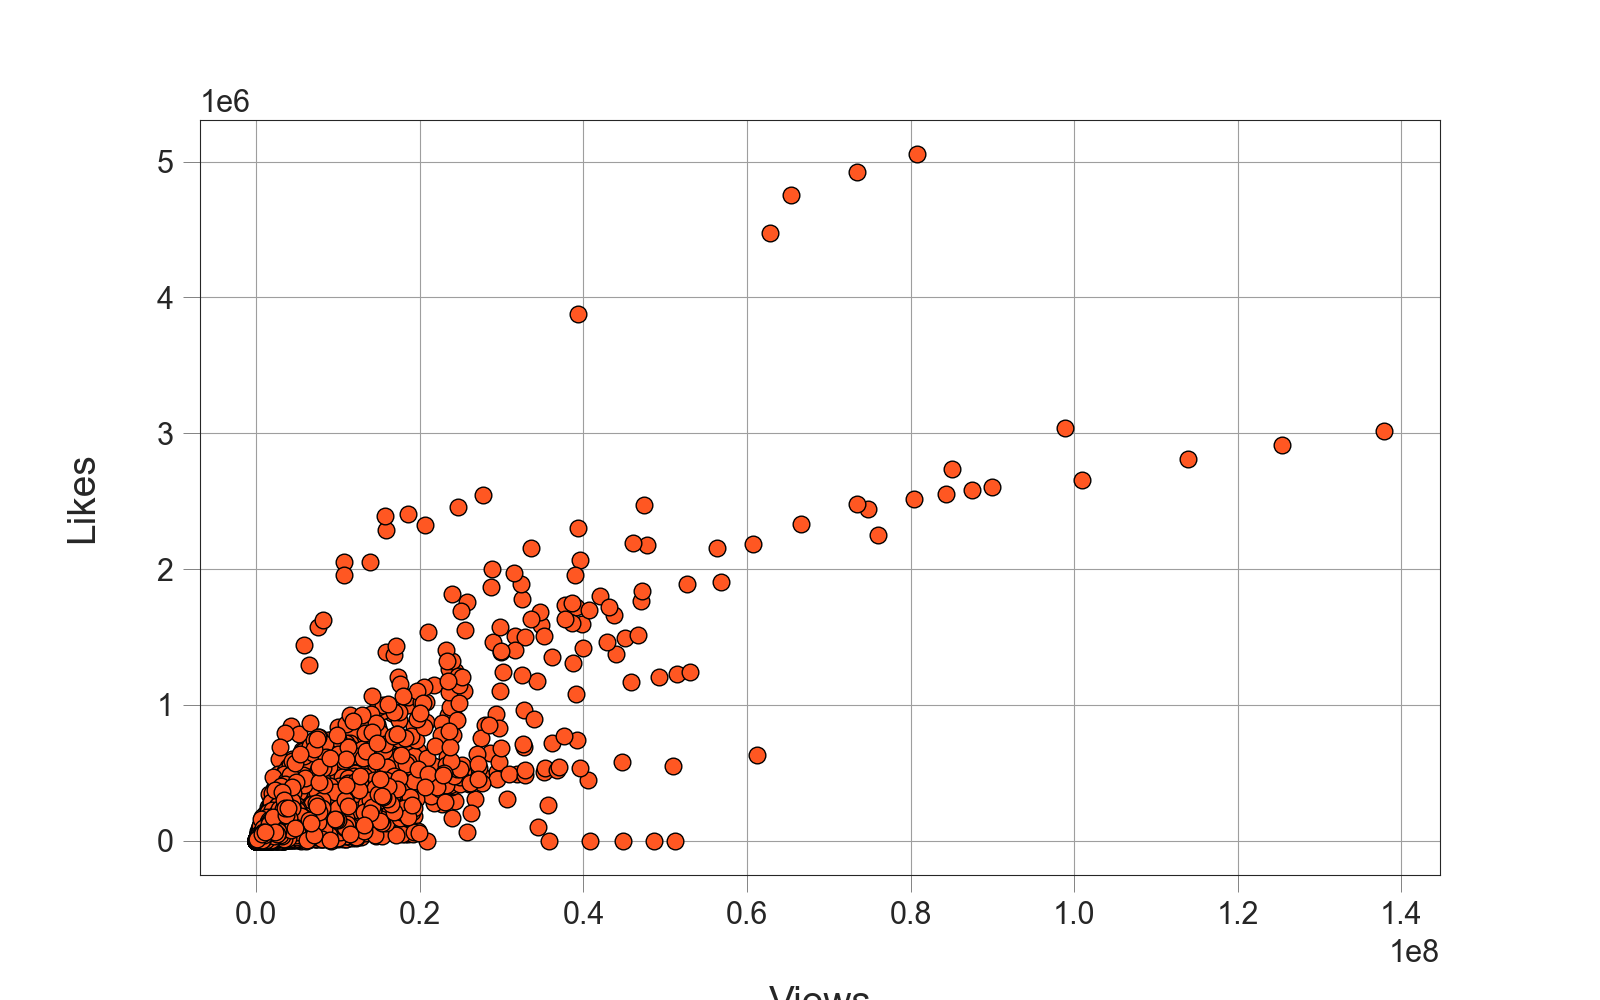

In [36]:
# 2、visualize the relationship between views and likes
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

### Explore other topic

<IPython.core.display.Javascript object>


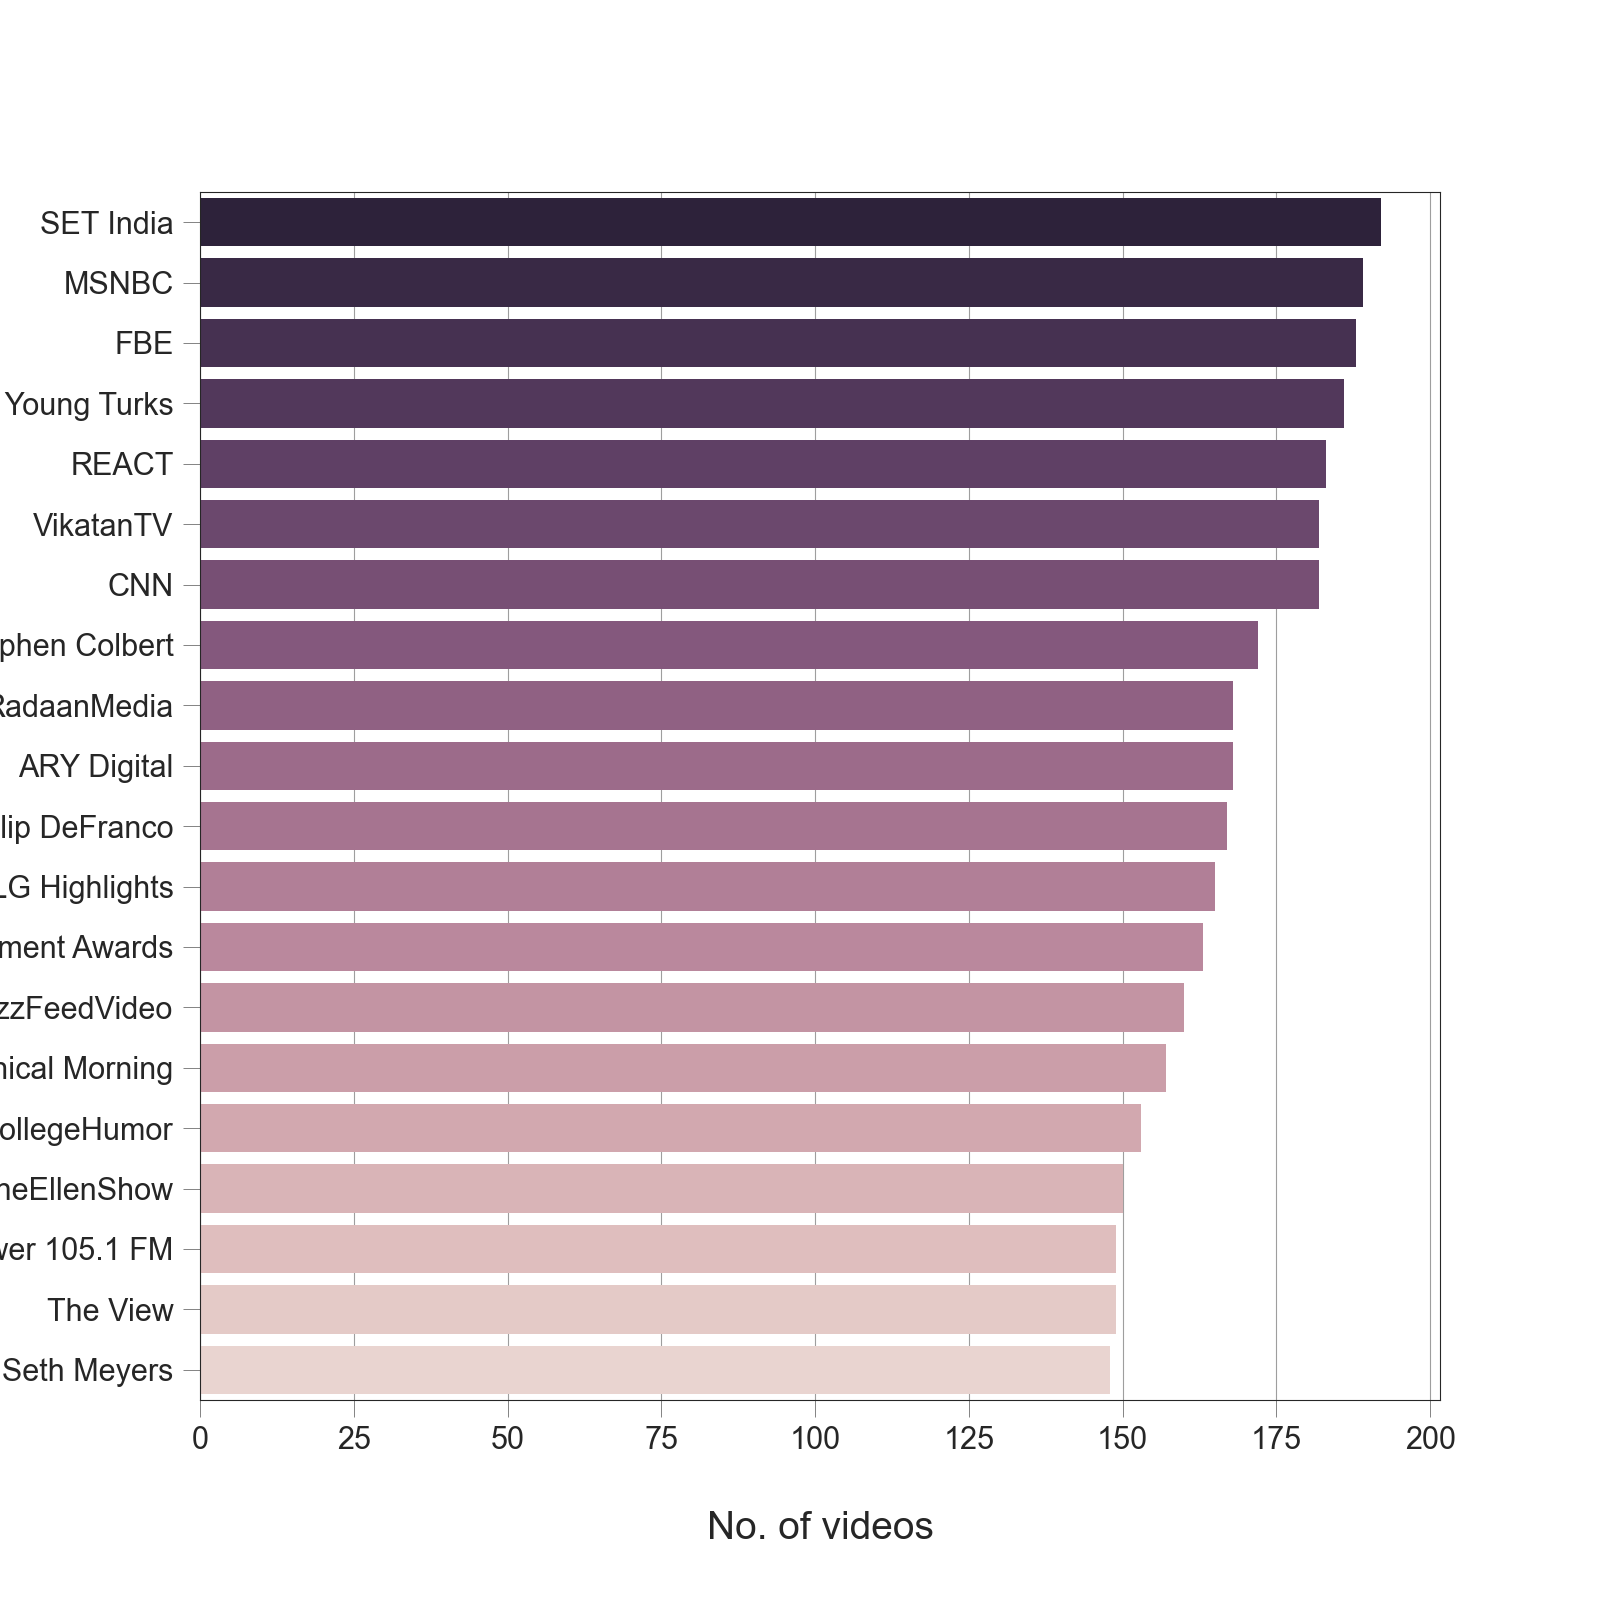

In [70]:
# 2、Which channels have the largest number of trending videos?
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [71]:
# 3、Which video category has the largest number of trending videos?
with open('/Users/zhujinghong/Downloads/5003 project/data/CA_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

<IPython.core.display.Javascript object>


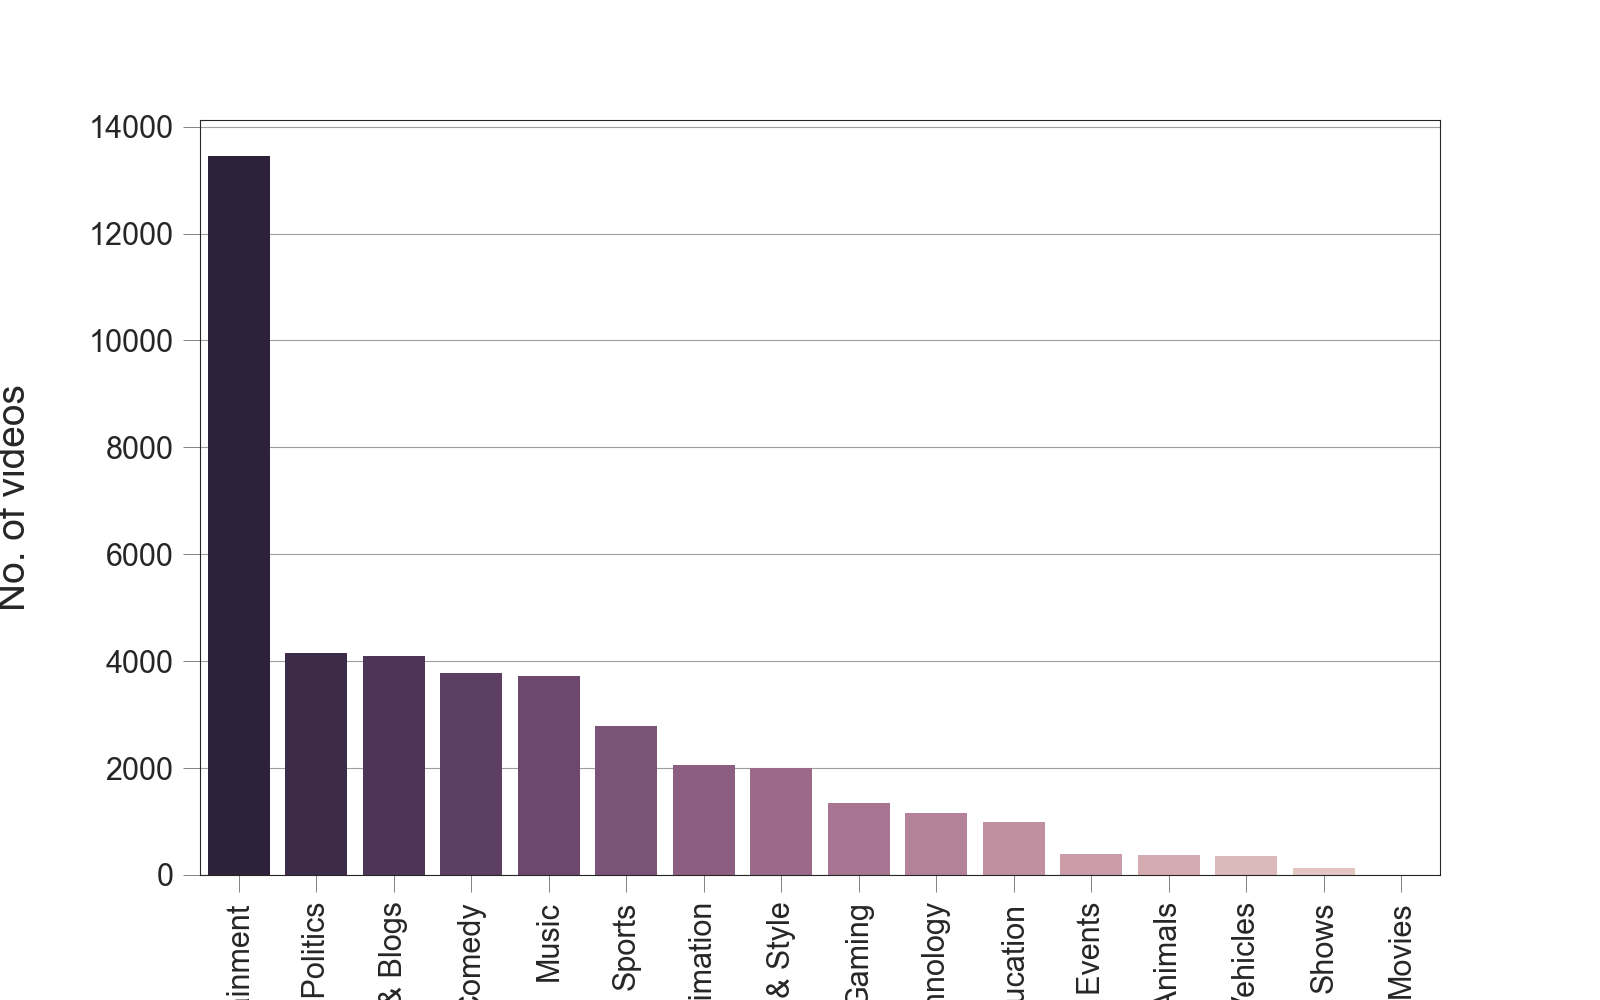

In [72]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

In [44]:
# 4、Trending videos and their publishing time
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

<IPython.core.display.Javascript object>


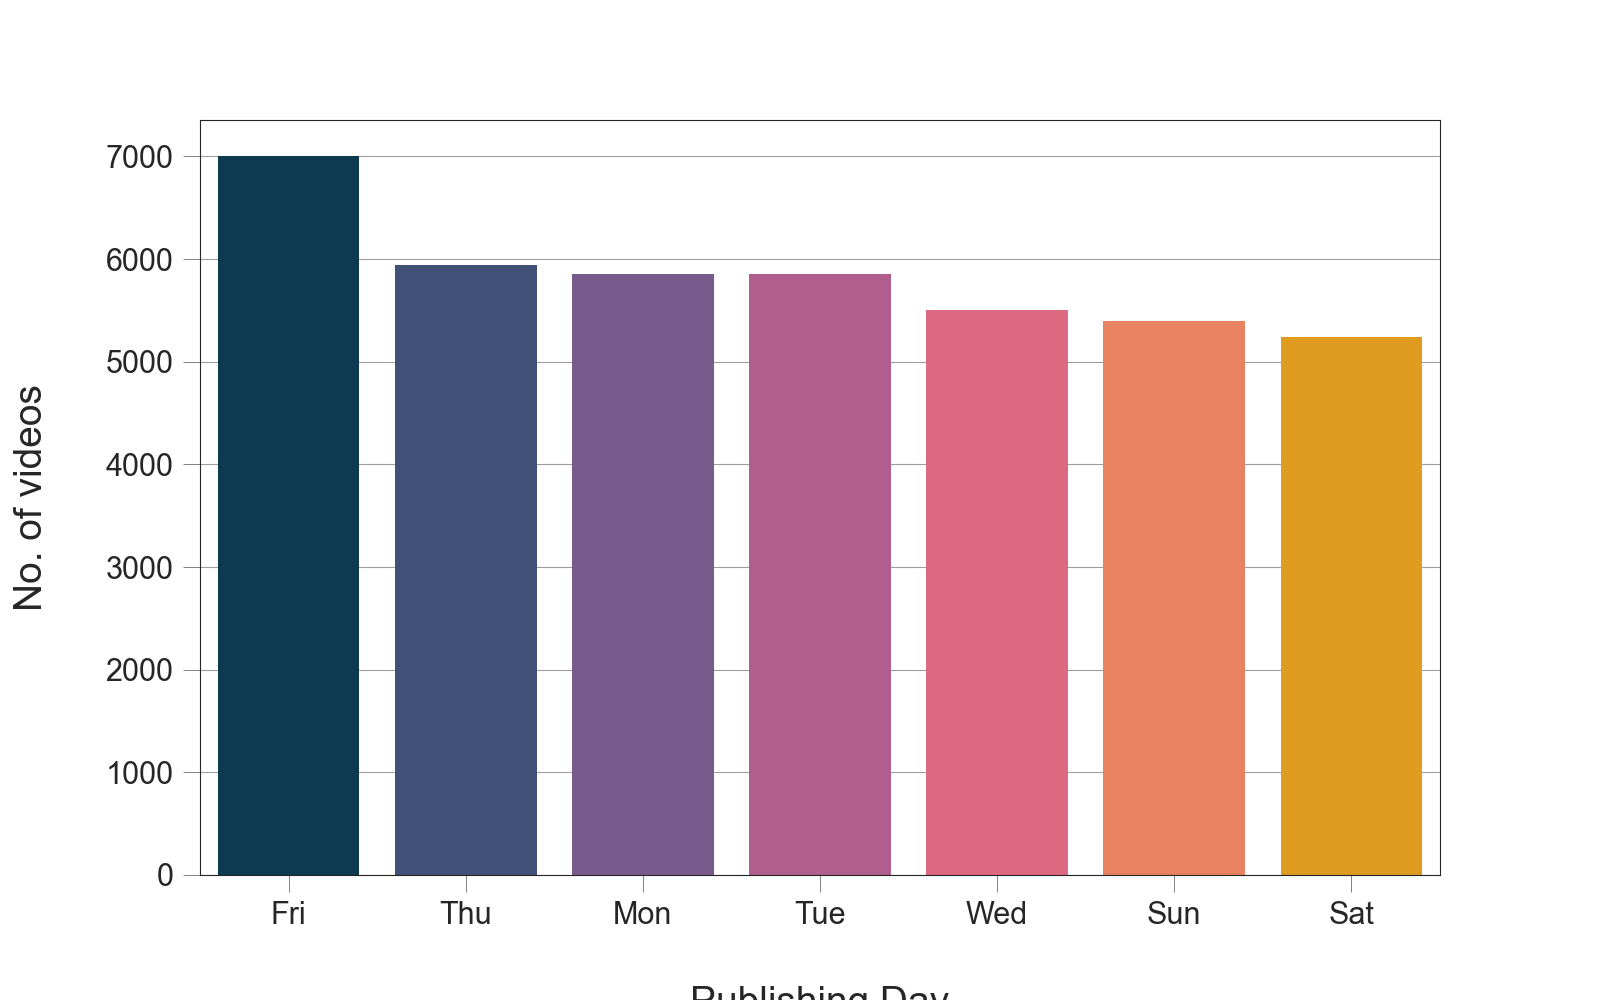

In [45]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

In [1]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=20), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

NameError: name 'df' is not defined

### Other colunms

<IPython.core.display.Javascript object>


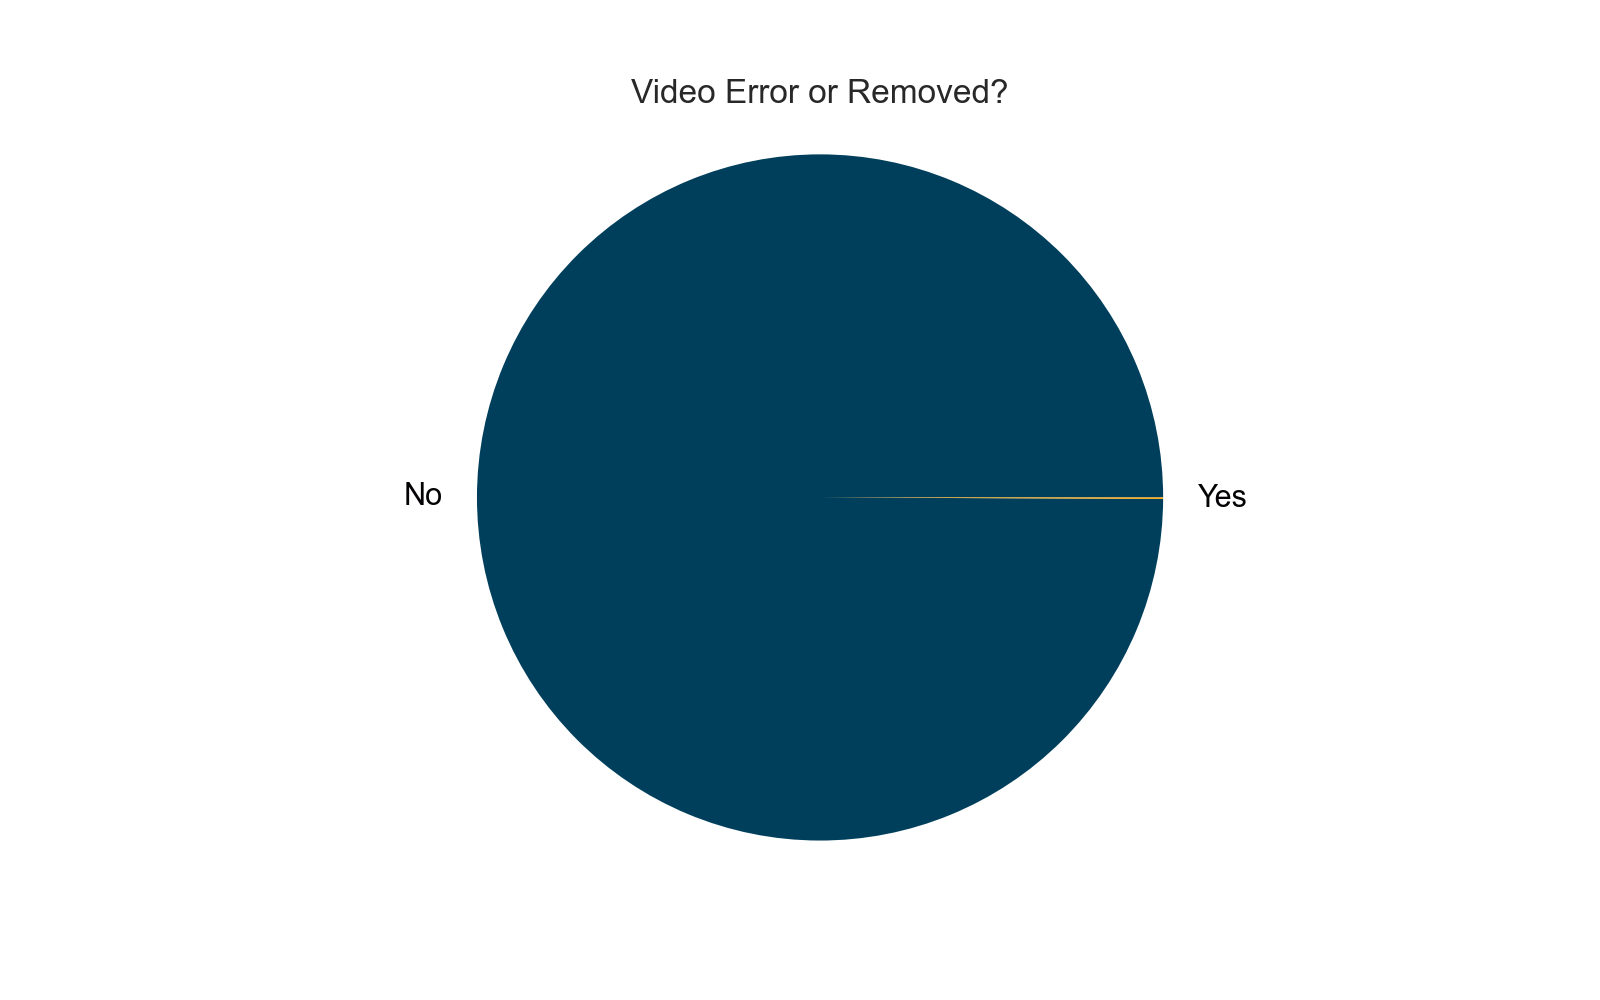

In [76]:
# 5、How many trending videos have an error?¶
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [77]:
df["video_error_or_removed"].value_counts()

False    40854
True        27
Name: video_error_or_removed, dtype: int64

<IPython.core.display.Javascript object>


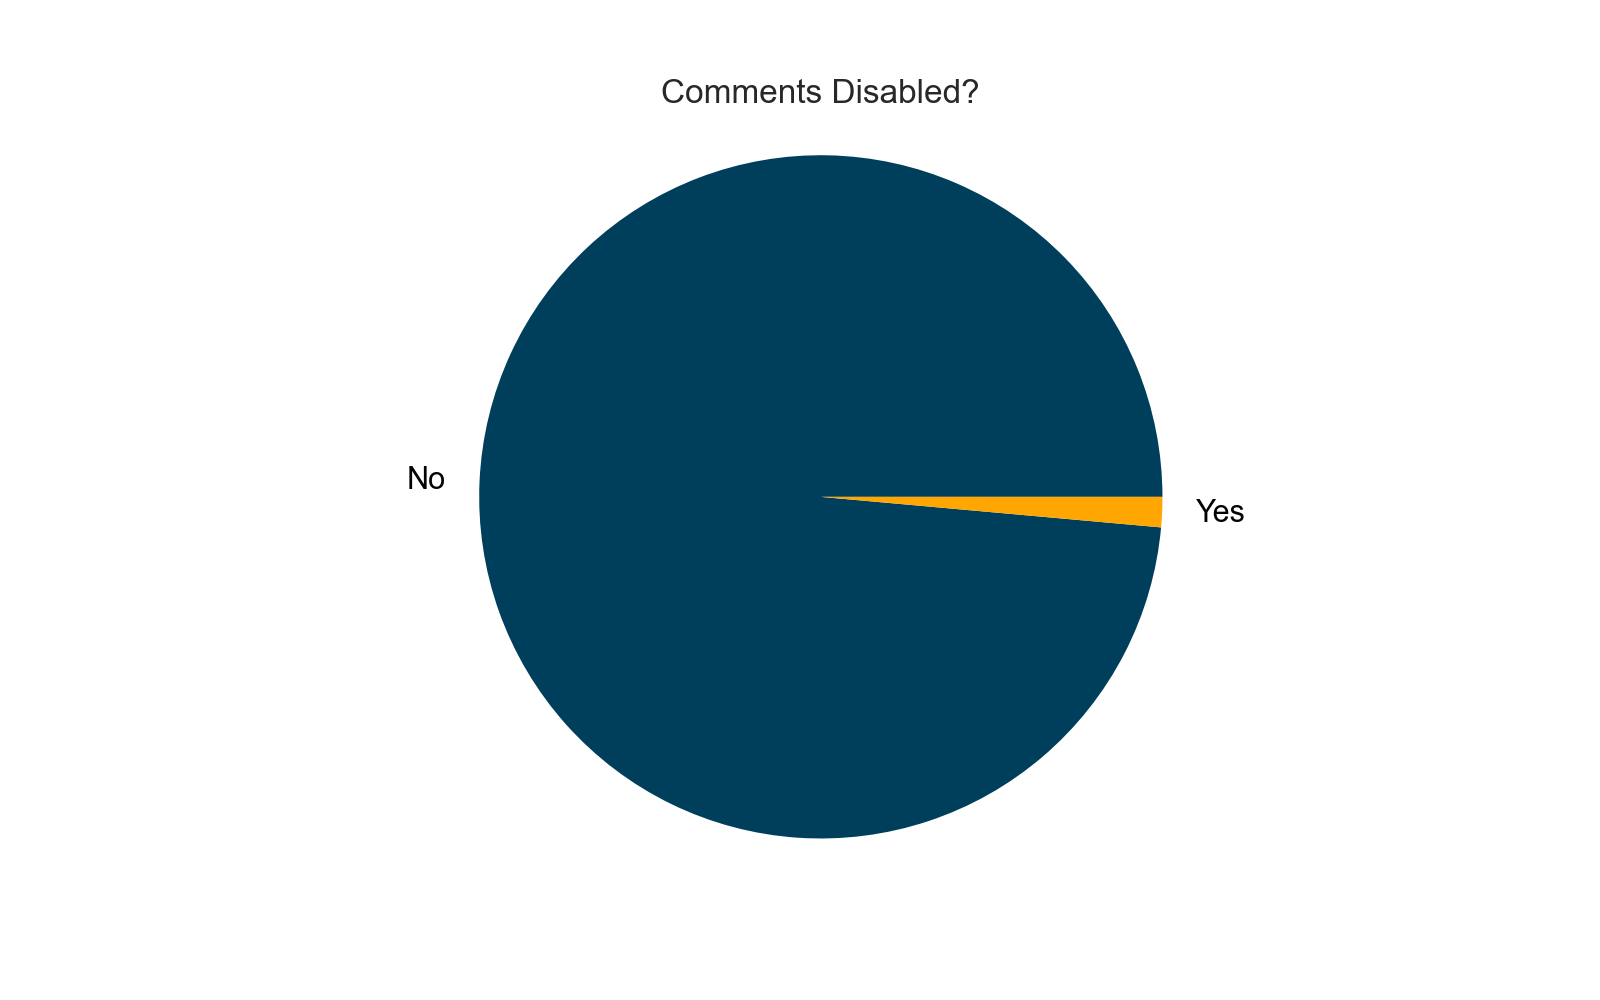

In [78]:
# 6、How many trending videos have their commets disabled?
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [79]:
df["comments_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

<IPython.core.display.Javascript object>


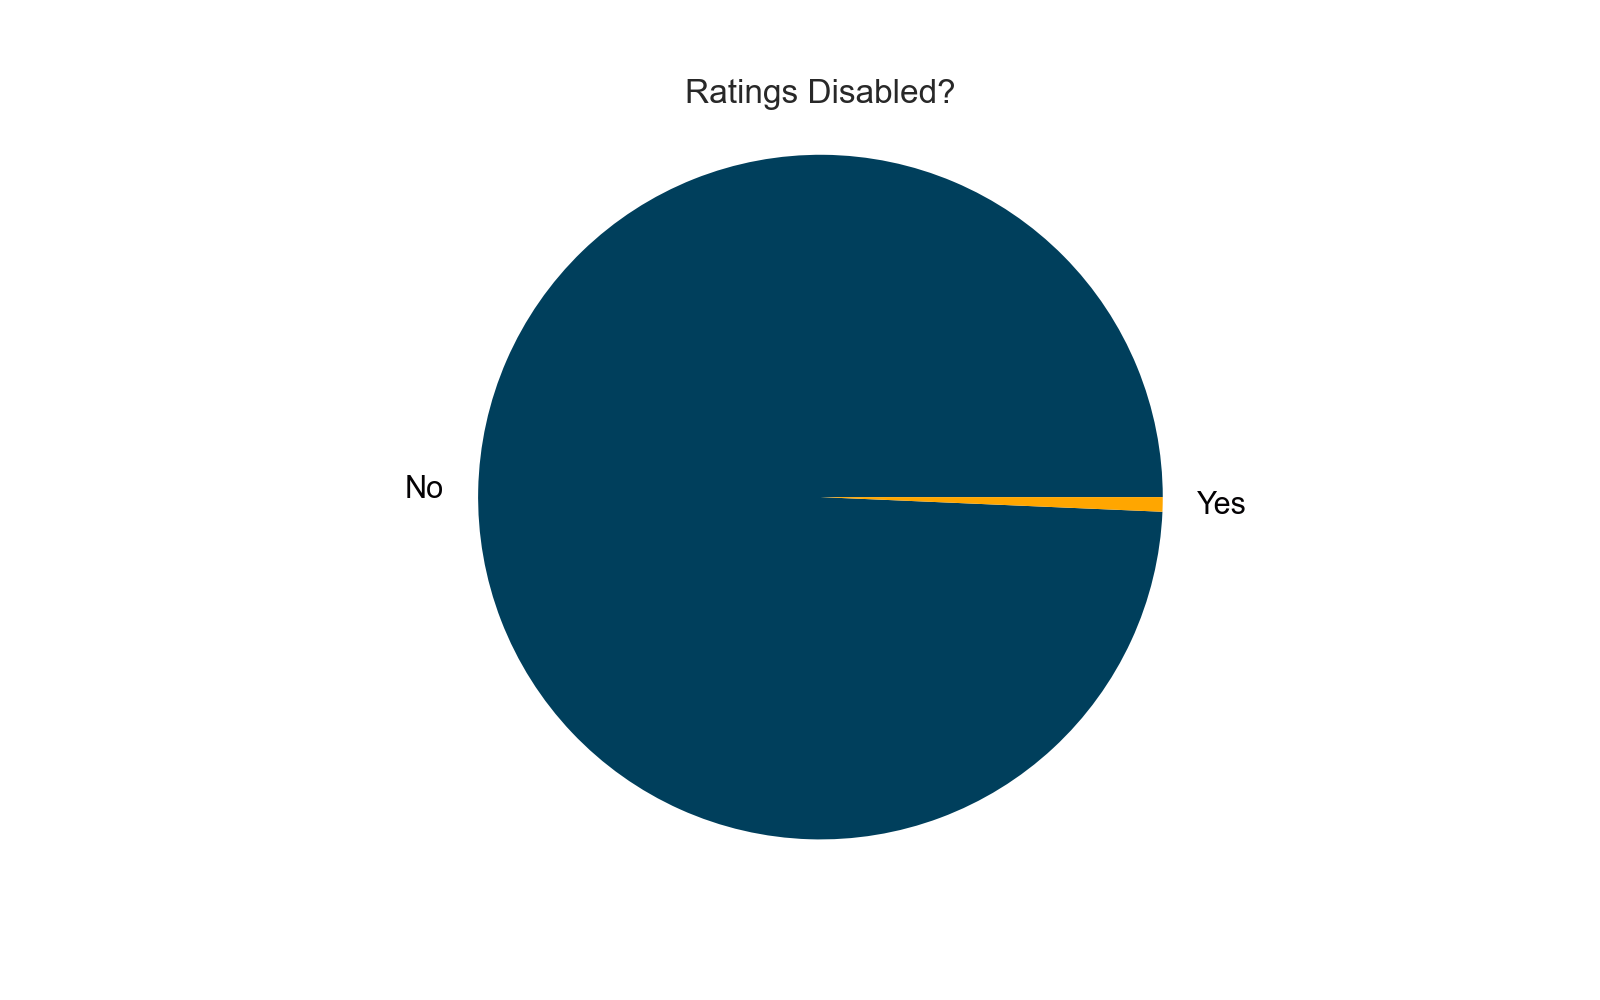

In [80]:
# 7、How many trending videos have their ratings disabled?
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [81]:
df["ratings_disabled"].value_counts()

False    40602
True       279
Name: ratings_disabled, dtype: int64

In [82]:
# 8、How many videos have both comments and ratings disabled?
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

63